# Curriculum Learning

In [1]:
import sys
sys.path.insert(0, '../../src/')

import numpy as np
import matplotlib.pyplot as plt
import pickle
import config
import torch
from tqdm.notebook import tqdm
from copy import copy, deepcopy
import cmath
import chess
from utils import saver, loader

from agents import *
from environments import *
from models import *
%matplotlib inline

np.set_printoptions(precision = 3)

print("PyTorch version:", torch.__version__)  
print("CUDA toolkit version PyTorch was built with:", torch.version.cuda)  
print("cuDNN version:", torch.backends.cudnn.version()) 
print("cuda available:", torch.cuda.is_available())

torch.set_float32_matmul_precision('high')

PyTorch version: 2.7.1+cu128
CUDA toolkit version PyTorch was built with: 12.8
cuDNN version: 90701
cuda available: True


In [8]:
torch.manual_seed(42)
random.seed(42)
np.random.seed(42)
agent = Agent(board_logic = BoardLogic(), in_ch=14, ch=128, n_blocks=8)
print(sum(p.numel() for p in agent.online_net1.parameters() if p.requires_grad))

opt_list = [None, None]

model = Model(agent = agent,
               environment = Environment(max_num_moves=200,),
               mem_capacity = 200000,
               batch_size = 512,
               num_warmup = 20000,
               policy_update = 2,
               target_update = 10000,
               temp_constants = (0.01, 0.001, 1e-5, 10000),
               #temp_constants = (0.5, 0.02, 1e-5, 10000),
               opt_list=opt_list,
               scaler=torch.amp.GradScaler("cuda")
             )

optimizer_grouped_parameters1 = group_decay_parameters(
    agent.online_net1,
    weight_decay=1e-5,
    no_decay=["bias", "GroupNorm.weight"],
    )

optimizer_grouped_parameters2 = group_decay_parameters(
    agent.online_net2,
    weight_decay=1e-5,
    no_decay=["bias", "GroupNorm.weight"],
    )

opt_list[0] = torch.optim.AdamW(optimizer_grouped_parameters1, lr=1e-4)
opt_list[1] = torch.optim.AdamW(optimizer_grouped_parameters2, lr=1e-4)


eval_agents = EvaluateAgents(agent1 = agent, 
                             agent2 = deepcopy(agent), 
                             environment = Environment(max_num_moves=200,), 
                             num_games=2,
                             temp = 0.25)


2389452


In [9]:
model.train(num_episodes = 5000, 
            evaluate_agents = eval_agents,
            freq=1000)

save_checkpoint(model, filename="model_conv_5000_episodes_low_temp.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Checkmate!
{1: 1, -1: 0, 0: 1} 0 0
Checkmate!


KeyboardInterrupt: 

In [ ]:
model = load_checkpoint(filename="model_conv_5000_episodes_low_temp.pth", model=model)
agent1 = model.agent
agent2 = deepcopy(agent1)
eval_agents = EvaluateAgents(agent1 = agent1, 
                             agent2 = agent2, 
                             environment = Environment(max_num_moves=200,), 
                             num_games=200,
                             temp = 0.25)

model.train(num_episodes = 5000, 
            evaluate_agents = eval_agents,
            freq=1000)

save_checkpoint(model, filename="model_conv_10000_episodes_low_temp.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{1: 69, -1: 74, 0: 57} tensor(0.0078, device='cuda:0') 0.7262388533494604


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 74, -1: 65, 0: 61} tensor(0.0067, device='cuda:0') 0.6129785600813136


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 70, -1: 76, 0: 54} tensor(0.0074, device='cuda:0') 0.5832864088692751


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 68, -1: 68, 0: 64} tensor(0.0076, device='cuda:0') 1.0281935460777498


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 75, -1: 71, 0: 54} tensor(0.0062, device='cuda:0') 0.9461360659567625


In [5]:
model = load_checkpoint(filename="model_conv_10000_episodes_small.pth", model=model)
agent1 = model.agent
agent2 = deepcopy(agent1)
eval_agents = EvaluateAgents(agent1 = agent1, 
                             agent2 = agent2, 
                             environment = Environment(max_num_moves=200,), 
                             num_games=200,
                             temp = 0.25)

model.train(num_episodes = 5000, 
            evaluate_agents = eval_agents,
            freq=1000)

save_checkpoint(model, filename="model_conv_15000_episodes_small.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{1: 71, -1: 75, 0: 54} tensor(0.0025, device='cuda:0') 0.5411745189792581


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 72, -1: 76, 0: 52} tensor(0.0037, device='cuda:0') 0.3030253621624915


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 70, -1: 75, 0: 55} tensor(0.0069, device='cuda:0') 0.31170014148778413


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 77, -1: 71, 0: 52} tensor(0.0079, device='cuda:0') 0.5146683625818238


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 76, -1: 75, 0: 49} tensor(0.0084, device='cuda:0') 0.6682455428831634


In [6]:
model = load_checkpoint(filename="model_conv_15000_episodes_small.pth", model=model)
agent1 = model.agent
agent2 = deepcopy(agent1)
eval_agents = EvaluateAgents(agent1 = agent1, 
                             agent2 = agent2, 
                             environment = Environment(max_num_moves=200,), 
                             num_games=200,
                             temp = 0.25)

model.train(num_episodes = 5000, 
            evaluate_agents = eval_agents,
            freq=1000)

save_checkpoint(model, filename="model_conv_20000_episodes_small.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{1: 65, -1: 78, 0: 57} tensor(0.0067, device='cuda:0') 0.5789430864301383


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 72, -1: 76, 0: 52} tensor(0.0035, device='cuda:0') 0.9652452348095794


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 77, -1: 59, 0: 64} tensor(0.0049, device='cuda:0') 0.5162512952476506


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 78, -1: 62, 0: 60} tensor(0.0047, device='cuda:0') 0.5675258998317547


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 70, -1: 79, 0: 51} tensor(0.0044, device='cuda:0') 0.6035290582648177


In [7]:
model = load_checkpoint(filename="model_conv_20000_episodes_small.pth", model=model)
agent1 = model.agent
agent2 = deepcopy(agent1)
eval_agents = EvaluateAgents(agent1 = agent1, 
                             agent2 = agent2, 
                             environment = Environment(max_num_moves=200,), 
                             num_games=200,
                             temp = 0.25)

model.train(num_episodes = 5000, 
            evaluate_agents = eval_agents,
            freq=1000)

save_checkpoint(model, filename="model_conv_25000_episodes_small.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

{1: 67, -1: 66, 0: 67} tensor(0.0048, device='cuda:0') 0.4630360050895621


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 60, -1: 77, 0: 63} tensor(0.0056, device='cuda:0') 0.447660346258813


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 69, -1: 72, 0: 59} tensor(0.0055, device='cuda:0') 0.5486115583059085


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 71, -1: 69, 0: 60} tensor(0.0081, device='cuda:0') 0.5850166520178318


  0%|          | 0/200 [00:00<?, ?it/s]

{1: 74, -1: 68, 0: 58} tensor(0.0044, device='cuda:0') 0.9728907794496523


In [8]:
model = load_checkpoint(filename="model_conv_25000_episodes_small.pth", model=model)
agent1 = model.agent
agent2 = deepcopy(agent1)
eval_agents = EvaluateAgents(agent1 = agent1, 
                             agent2 = agent2, 
                             environment = Environment(max_num_moves=200,), 
                             num_games=200,
                             temp = 0.25)

model.train(num_episodes = 5000, 
            evaluate_agents = eval_agents,
            freq=1000)

save_checkpoint(model, filename="model_conv_30000_episodes_small.pth")

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
model = load_checkpoint(filename="model_conv_25000_episodes_small.pth", model=model)

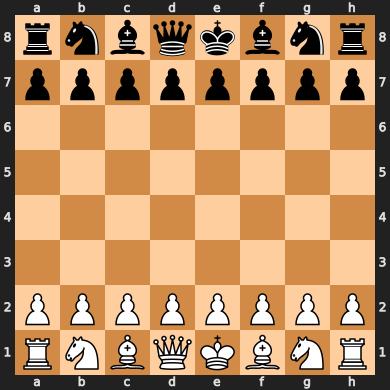

In [10]:
environment = Environment(max_num_moves=200,)
environment.reset()
#random.seed(42)
#np.random.seed(42)
#torch.manual_seed(42)

In [ ]:
action = agent.select_action(environment, temp=0.01, greedy=False)
move = agent.action_to_move(action)

board, (reward, done) = environment.step(move)

state = agent.board_logic.board_to_state(board).to(config.device)

Q1 = agent.online_net1(state).detach()
Q2 = agent.online_net2(state).detach()
legal_moves = environment.get_legal_moves()
mask_legal = agent.get_mask_legal(legal_moves)

Q1_legal = Q1[mask_legal]
Q2_legal = Q2[mask_legal]

diff = torch.abs(Q1_legal - Q2_legal)/torch.max(torch.abs(Q1_legal), torch.abs(Q2_legal))

print(f"{np.mean(diff.cpu().numpy()):.4f}")

Q_legal = Q1.masked_fill(~mask_legal, -1e9)
action_star = torch.argmax(Q_legal, dim=1).to(config.device)
score = Q2[0,action_star[0]]

if environment.mirror:
    print("Black:")
    print(f"score: {score.item():.4f}")
    print(board.mirror())
else:
    print("White:")
    print(f"score: {score.item():.4f}")
    print(board)


if board.is_checkmate():
    print("checkmate!")

Q_legal = Q1.masked_fill(~mask_legal, -float('inf'))
print(Q_legal[Q_legal>-1])

q_max = Q_legal.max(dim=1, keepdim=True).values
print(q_max)

logits = (Q_legal - q_max)/0.01
probs = torch.softmax(logits, dim=1)
print(probs[probs>0.001])

0.3844
Black:
score: -0.0073
r n b . k b . r
. p p q . p . N
. . . . p . p .
p . . . . . . .
. . . p . P n .
. P . . P . . .
P . P P . . P P
R N B Q K B R .
tensor([-0.0529, -0.0085, -0.0074, -0.0266, -0.0294, -0.0244, -0.0139, -0.0256,
        -0.0279, -0.0361, -0.0273, -0.0185, -0.0440, -0.0519, -0.0362, -0.0260,
        -0.0137, -0.0232, -0.0382,  0.0089, -0.0838, -0.0078, -0.0247, -0.0578,
        -0.0372, -0.0174, -0.0622, -0.0143, -0.0506, -0.0061, -0.0280, -0.0330,
        -0.0410, -0.0276, -0.0389, -0.0250, -0.0131, -0.0308, -0.0205],
       device='cuda:0')
tensor([[0.0089]], device='cuda:0')
tensor([0.0616, 0.0685, 0.0101, 0.0076, 0.0125, 0.0357, 0.0111, 0.0088, 0.0039,
        0.0093, 0.0227, 0.0018, 0.0039, 0.0107, 0.0366, 0.0142, 0.0031, 0.3514,
        0.0661, 0.0121, 0.0035, 0.0253, 0.0345, 0.0778, 0.0088, 0.0053, 0.0024,
        0.0091, 0.0029, 0.0118, 0.0387, 0.0066, 0.0186], device='cuda:0')
